In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from WindPy import w
%matplotlib inline

In [24]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [25]:
def wind2df(raw_data):
    dic = {}
    return pd.DataFrame({'close': raw_data.Data[0]}, index=raw_data.Times)

In [27]:
data = w.wsd('881001.WI', 'close', '2007-01-01', '2017-11-30')

In [28]:
price = wind2df(data)

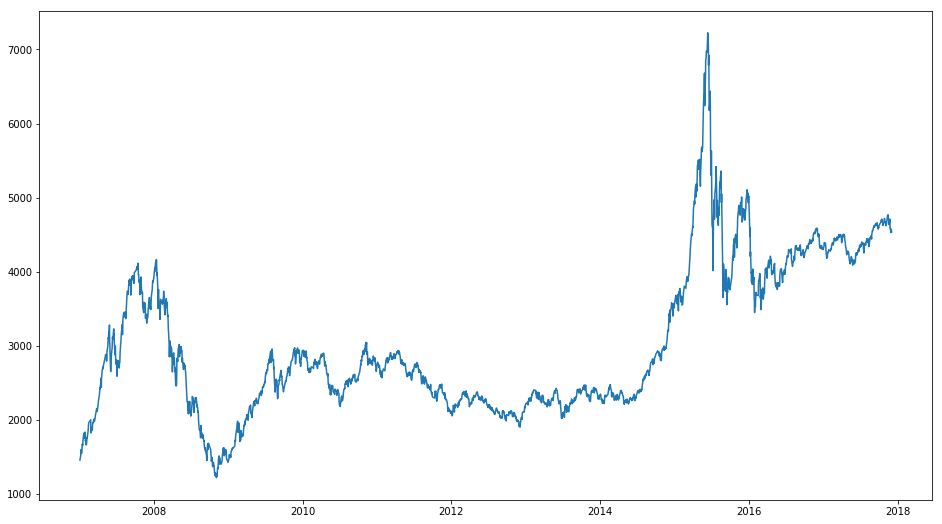

In [29]:
plt.figure(figsize=(16, 9))
plt.plot(price['close'])

In [2]:
df = pd.read_excel('./data/vector.xlsx')

In [26]:
df.head()

,CNY,st vol,commodity,CGB1Y,CGB10Y,st price,CPI,PMI
2007-01-31,0.014463,0.983471,0.555785,0.719008,0.440083,0.983471,0.875000,0.729167
2007-02-28,0.002066,0.987603,0.826446,0.805785,0.512397,0.993802,0.937500,0.354167
2007-03-31,0.008264,0.894628,0.907025,0.926653,0.859504,0.993802,1.000000,0.875000
2007-04-30,0.002066,0.969008,0.873967,0.975207,0.966942,1.000000,0.958333,1.000000
2007-05-31,0.004132,0.987603,0.739669,1.000000,0.991736,0.985537,1.000000,0.833333


In [4]:
df.tail()

,CNY,st vol,commodity,CGB1Y,CGB10Y,st price,CPI,PMI
2017-07-31,0.597107,0.768595,0.927686,0.886364,0.966942,0.754132,0.250000,0.812500
2017-08-31,0.400826,0.673554,0.991736,0.869835,0.946281,0.902893,0.562500,0.916667
2017-09-30,0.438017,0.264463,0.764463,0.915289,0.884298,0.896694,0.437500,1.000000
2017-10-31,0.382231,0.200413,0.706612,0.981405,0.997934,0.902893,0.625000,0.770833
2017-11-30,0.336777,0.183884,0.931818,0.985537,0.966942,0.818182,0.416667,0.937500


In [44]:
bull = df[(df.index >= '2017-01-01') & (df.index <= '2017-12-01')]

In [45]:
bull_vector = bull.mean()

In [46]:
dist = df.apply(lambda x: np.linalg.norm(x - bull_vector), axis=1)

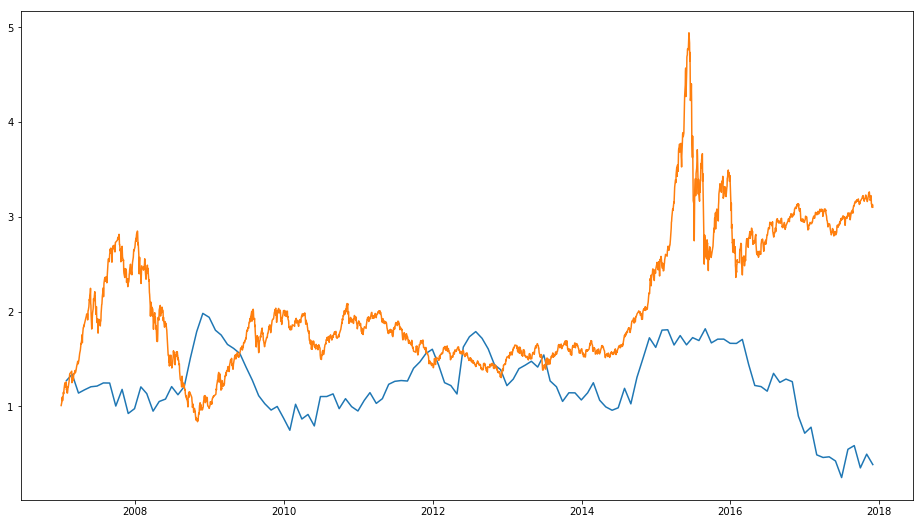

In [47]:
plt.figure(figsize=(16, 9))
plt.plot(dist)
plt.plot((1+price['close'].pct_change()).cumprod())

# 相邻两个月之间的距离

In [55]:
neibor = pd.Series(index=df.index)
for i, date in enumerate(df.index):
    if i > 0:
#         print i, df.loc[df.index[i - 1]], df.loc[date]
        neibor.loc[date] = np.linalg.norm(df.loc[date] - df.loc[df.index[i - 1]])

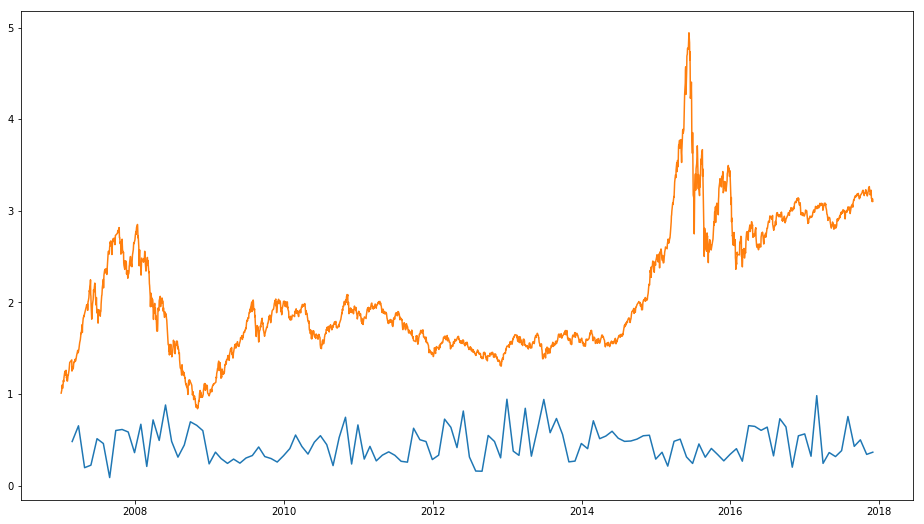

In [57]:
plt.figure(figsize=(16, 9))
plt.plot(neibor)
plt.plot((1+price['close'].pct_change()).cumprod())